In [1]:
! pip install clustergram
#! pip install urbangrammar-graphics==1.2.2

In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [45]:
transactions = pd.read_excel('data/Данные транзакций.xlsx', sheet_name=0)
categories = pd.read_excel('data/Данные транзакций.xlsx', sheet_name=1)


,Unnamed: 0,Unnamed: 0.1,code,tags,shops,Markdown
0,0,0,6538,MasterCard MoneySend Funding Transaction,MONEYMAN; Mob card; MND PAPAZAIM; moneyman; CA...,HardwareAndSoftware
1,1,1,5310,Discount stores,IP SHARTSMAN T R; MPR; KHOZMARKET; IP ASHUROV;...,HardwareAndSoftware
2,2,2,5046,Commercial Equipment N-Else,VENDING,HardwareAndSoftware
3,3,3,6533,Payment Service Provider -,binance.com,HardwareAndSoftware
4,4,4,5965,Direct Marketing-Combinatio,NLSTAR,HardwareAndSoftware
...,...,...,...,...,...,...
212,212,212,8398,Charitable Contributions,MMR*DonationAlerts; BF PODARKI DETYAM; homeles...,HardwareAndSoftware
213,213,213,7375,Info Retrieval Services,AO BANK PSKB; RUSPROFILE.RU; maminovremya; WWW...,HardwareAndSoftware
214,214,214,7299,Other Services (Not Elsewhe,NIMFA; MUP DGPKIO 2; VELOMASTERSKAYA; TUALET K...,HardwareAndSoftware
215,215,215,5733,Music Stores-musical Instru,PEDAL ZOO,HardwareAndSoftware


In [48]:
tags = pd.read_csv('tags.csv')

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,code,tags,shops,Markdown
0,0,0,0,6538,MasterCard MoneySend Funding Transaction,MONEYMAN; Mob card; MND PAPAZAIM; moneyman; CA...,Transactions
1,1,1,1,5310,Discount stores,IP SHARTSMAN T R; MPR; KHOZMARKET; IP ASHUROV;...,Shops
2,2,2,2,5046,Commercial Equipment N-Else,VENDING,Furnurure
3,3,3,3,6533,Payment Service Provider -,binance.com,Subscriptions
4,4,4,4,5965,Direct Marketing-Combinatio,NLSTAR,Shops
...,...,...,...,...,...,...,...
212,212,212,212,8398,Charitable Contributions,MMR*DonationAlerts; BF PODARKI DETYAM; homeles...,Subscriptions
213,213,213,213,7375,Info Retrieval Services,AO BANK PSKB; RUSPROFILE.RU; maminovremya; WWW...,Services
214,214,214,214,7299,Other Services (Not Elsewhe,NIMFA; MUP DGPKIO 2; VELOMASTERSKAYA; TUALET K...,Services
215,215,215,215,5733,Music Stores-musical Instru,PEDAL ZOO,Hobbies


In [72]:
for i in range(len(tags.tags.values)):
    if 'Heating' in str(tags.tags.values[i]):
        print(i, tags.tags.values[i])
               

106 Heating,Plumbing,Air Condit
192 Plumbing/Heating Equipment


In [76]:
tags.loc[[106, 192], 'Markdown'] = ['Furnurure'] * 2

In [77]:
tags['Markdown'].value_counts()

Hobbies                  29
Services                 28
Shops                    19
Auto                     18
Clothes                  17
Entertainment            15
Furnurure                15
HardwareAndSoftware      14
Health                   13
Subscriptions            10
Education                 9
Transportation            7
Transactions              6
TaxesAndFines             6
Food                      6
MoneySaveAndInvesting     3
Hotels                    2
Name: Markdown, dtype: int64

In [79]:
tags.to_csv('tags.csv')

In [5]:
transactions.sample(5)

,ID клиента по порядку,ID карты по порядку,Счет карты кредитный,Дата,Сумма,Валюта,Назначение платежа,МСС код,МСС расшифровка
94954,347,286,Нет,24.08.2021,-424.6879,RUR,Покупка MAGNIT MM SHNEER,5411.0,"5411 Grocery Stores,supermarkets"
89309,327,260,Нет,09.08.2021,-642.9700,RUR,Покупка SHELL,5541.0,5541 Service Stations
10726,40,137,Нет,17.08.2021,-4362.8283,RUR,Перевод LR*web-zaim.ru/2,6538.0,6538 MasterCard MoneySend Funding Transaction
69575,255,273,Нет,16.08.2021,226.0000,RUR,Пополнение PSB-RETAIL 00887772,4829.0,4829 Money Transfer
107065,392,353,Нет,12.08.2021,2825.0000,RUR,Пополнение PSB-RETAIL 00777781,4829.0,4829 Money Transfer


In [6]:
cat_dict = {0: 'Not found'}

for row in categories.values:
    cat_dict[row[0]] = row[-1]

In [7]:
transactions['Приход'] = [max(x, 0) for x in transactions['Сумма']]
transactions['Расход'] = [min(x, 0) for x in transactions['Сумма']]

transactions = transactions.fillna(0)

transactions['Категория'] = transactions['МСС код'].apply(lambda x: cat_dict[int(x)])

transactions.loc[transactions['МСС код'].isna(), 'МСС код'] = 0

In [8]:
transactions.isna().sum()

ID клиента по порядку    0
ID карты по порядку      0
Счет карты кредитный     0
Дата                     0
Сумма                    0
Валюта                   0
Назначение платежа       0
МСС код                  0
МСС расшифровка          0
Приход                   0
Расход                   0
Категория                0
dtype: int64

In [9]:
def agg_credict_card(x):
    x = x.values
    
    if len(set(x)) > 1:
        return  2
    elif 'Да' in x:
        return 1
    elif 'Нет' in x:
        return 0
    
    
def agg_top_category(x):
    top_indx = min(5, len(x.value_counts()))
    # print(len(x.value_counts()))
    return ' '.join(str(x.value_counts()[:top_indx].values))


def agg_len_expenditure(x):
    # print(len(x[x<0]))
    return len(x[x<0])

def agg_len_income(x):
    # print(len(x[x>0]))
    return len(x[x>0])

In [10]:
len(categories['GROUP_CODE'].value_counts())

11

In [11]:
transactions.groupby(['ID клиента по порядку', 'Категория'])['Категория'].count()
 

ID клиента по порядку  Категория                     
1                      Restaurant                          3
                       Retail Purchase                   211
                       Unique                             40
2                      Financial Institutions              7
                       Hospitalization/School Expense      1
                                                        ... 
479                    Payment Services                    6
                       Restaurant                         31
                       Retail Purchase                   149
                       Transportation                      2
                       Unique                             37
Name: Категория, Length: 2961, dtype: int64

In [12]:
df = transactions.groupby(['ID карты по порядку']).agg(
    # total
    toal_income = pd.NamedAgg(column = 'Приход', aggfunc = 'sum'),
    total_expendature = pd.NamedAgg(column = 'Расход', aggfunc = 'sum'),
    
    # median
    median_income = pd.NamedAgg(column = 'Приход', aggfunc='median'),
    median_expendature = pd.NamedAgg(column = 'Расход', aggfunc='median'),
    
    # mean
    mean_income = pd.NamedAgg(column = 'Приход', aggfunc='mean'),
    mean_expendature = pd.NamedAgg(column = 'Расход', aggfunc='mean'),
    
    # credit card
    credit_card = pd.NamedAgg(column = 'Счет карты кредитный', aggfunc = agg_credict_card),
    
    # top categories
    # op_categories = pd.NamedAgg(column = 'Категория', aggfunc = agg_top_category),
    
    # expenditure transactions 
    n_expenditure = pd.NamedAgg(column = 'Сумма', aggfunc = agg_len_expenditure),
    
    # expenditure income 
    n_income = pd.NamedAgg(column = 'Сумма', aggfunc = agg_len_income),
    
    
    ).reset_index()
 

In [13]:
df

,ID карты по порядку,toal_income,total_expendature,median_income,median_expendature,mean_income,mean_expendature,credit_card,n_expenditure,n_income
0,1,1.164570e+05,-2.930554e+05,0.00,-367.2500,426.582244,-1073.462954,0,267.0,6.0
1,2,3.987668e+05,-5.422522e+05,0.00,-339.0000,1487.935933,-2023.329174,0,226.0,42.0
2,3,3.912896e+05,-9.202488e+05,0.00,-530.5350,1482.157652,-3485.790956,0,226.0,38.0
3,4,3.794766e+05,-4.556708e+05,0.00,-132.7750,1345.661702,-1615.853838,0,194.0,88.0
4,5,1.583955e+05,-2.063822e+05,0.00,-115.2487,604.562810,-787.718256,0,244.0,18.0
...,...,...,...,...,...,...,...,...,...,...
474,475,1.541352e+05,-1.457971e+05,39.55,0.0000,531.500838,-502.748729,0,142.0,148.0
475,476,2.950837e+05,-3.045684e+05,0.00,-213.2310,1080.892601,-1115.635216,0,231.0,42.0
476,477,1.353684e+05,-1.892090e+05,0.00,-63.8450,512.759158,-716.700745,0,165.0,99.0
477,478,3.582665e+04,-9.107288e+04,0.00,-140.6850,141.049803,-358.554650,1,227.0,27.0


In [14]:
table_sum = transactions.groupby(['ID карты по порядку', 'Категория'])['Сумма'].sum().reset_index()
table_sum = pd.pivot_table(table_sum, index=['ID карты по порядку'], columns=['Категория']).fillna(0)['Сумма'].reset_index()
table_sum

Категория,ID карты по порядку,Cash,Financial Institutions,Hospitalization/School Expense,Hotel/Motel (Lodging),Mail/Telephone/Preauth order,Not found,Payment Services,Restaurant,Retail Purchase,Transportation,Unique,Vehicle Rental
0,1,0.0,0.0,0.0,0.0,-21399.3750,0.000,0.00,-40736.5000,-96401.0119,-11357.7430,4.993753e+03,-11697.5566
1,2,0.0,-28815.0,0.0,0.0,-2034.0000,0.000,0.00,-22573.6710,-179206.1576,-5480.5000,9.462394e+04,0.0000
2,3,0.0,-36725.0,0.0,0.0,-50102.2338,-16.950,0.00,-7533.0546,-256081.5040,0.0000,-1.785005e+05,0.0000
3,4,0.0,-20792.0,0.0,0.0,-4652.8089,0.000,245153.50,-9689.2980,-80994.2755,0.0000,-2.052193e+05,0.0000
4,5,0.0,0.0,0.0,0.0,-449.7400,0.000,0.00,-844.1100,-132888.9040,-32453.9729,1.186500e+05,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,475,0.0,-565.0,0.0,0.0,-21264.3400,0.000,72546.00,-875.7500,-43648.5213,-49.7200,2.195443e+03,0.0000
475,476,27120.0,-87010.0,0.0,0.0,-107149.0182,0.000,47008.00,-8555.2300,-27865.1559,-6667.0000,1.536337e+05,0.0000
476,477,0.0,0.0,0.0,0.0,-5090.7065,76.388,0.00,-6574.3400,-35482.1921,0.0000,-6.769728e+03,0.0000
477,478,0.0,-5650.0,0.0,0.0,0.0000,0.000,0.00,-26926.7700,-48192.6242,-4304.1700,2.982733e+04,0.0000


In [15]:
table_len = transactions.groupby(['ID карты по порядку', 'Категория'])['Сумма'].count().reset_index()
table_len = pd.pivot_table(table_len, index=['ID карты по порядку'], columns=['Категория']).fillna(0)['Сумма'].reset_index()
table_len

Категория,ID карты по порядку,Cash,Financial Institutions,Hospitalization/School Expense,Hotel/Motel (Lodging),Mail/Telephone/Preauth order,Not found,Payment Services,Restaurant,Retail Purchase,Transportation,Unique,Vehicle Rental
0,1,0.0,0.0,0.0,0.0,5.0,0.0,0.0,51.0,145.0,3.0,25.0,44.0
1,2,0.0,3.0,0.0,0.0,5.0,0.0,0.0,30.0,160.0,1.0,69.0,0.0
2,3,0.0,8.0,0.0,0.0,9.0,1.0,0.0,15.0,187.0,0.0,44.0,0.0
3,4,0.0,2.0,0.0,0.0,5.0,0.0,5.0,21.0,156.0,0.0,93.0,0.0
4,5,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,203.0,41.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,475,0.0,1.0,0.0,0.0,26.0,0.0,40.0,6.0,70.0,2.0,145.0,0.0
475,476,1.0,3.0,0.0,0.0,28.0,0.0,8.0,19.0,163.0,1.0,50.0,0.0
476,477,0.0,0.0,0.0,0.0,3.0,2.0,0.0,22.0,102.0,0.0,135.0,0.0
477,478,0.0,1.0,0.0,0.0,0.0,0.0,0.0,35.0,135.0,52.0,31.0,0.0


In [16]:
df = df.set_index('ID карты по порядку').join(table_sum.set_index('ID карты по порядку'))
df = df.join(table_len.set_index('ID карты по порядку'), how='left', lsuffix='_sum', rsuffix='_len')
df

,toal_income,total_expendature,median_income,median_expendature,mean_income,mean_expendature,credit_card,n_expenditure,n_income,Cash_sum,...,Hospitalization/School Expense_len,Hotel/Motel (Lodging)_len,Mail/Telephone/Preauth order_len,Not found_len,Payment Services_len,Restaurant_len,Retail Purchase_len,Transportation_len,Unique_len,Vehicle Rental_len
ID карты по порядку,,,,,,,,,,,,,,,,,,,,,
1,1.164570e+05,-2.930554e+05,0.00,-367.2500,426.582244,-1073.462954,0,267.0,6.0,0.0,...,0.0,0.0,5.0,0.0,0.0,51.0,145.0,3.0,25.0,44.0
2,3.987668e+05,-5.422522e+05,0.00,-339.0000,1487.935933,-2023.329174,0,226.0,42.0,0.0,...,0.0,0.0,5.0,0.0,0.0,30.0,160.0,1.0,69.0,0.0
3,3.912896e+05,-9.202488e+05,0.00,-530.5350,1482.157652,-3485.790956,0,226.0,38.0,0.0,...,0.0,0.0,9.0,1.0,0.0,15.0,187.0,0.0,44.0,0.0
4,3.794766e+05,-4.556708e+05,0.00,-132.7750,1345.661702,-1615.853838,0,194.0,88.0,0.0,...,0.0,0.0,5.0,0.0,5.0,21.0,156.0,0.0,93.0,0.0
5,1.583955e+05,-2.063822e+05,0.00,-115.2487,604.562810,-787.718256,0,244.0,18.0,0.0,...,0.0,0.0,2.0,0.0,0.0,6.0,203.0,41.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1.541352e+05,-1.457971e+05,39.55,0.0000,531.500838,-502.748729,0,142.0,148.0,0.0,...,0.0,0.0,26.0,0.0,40.0,6.0,70.0,2.0,145.0,0.0
476,2.950837e+05,-3.045684e+05,0.00,-213.2310,1080.892601,-1115.635216,0,231.0,42.0,27120.0,...,0.0,0.0,28.0,0.0,8.0,19.0,163.0,1.0,50.0,0.0
477,1.353684e+05,-1.892090e+05,0.00,-63.8450,512.759158,-716.700745,0,165.0,99.0,0.0,...,0.0,0.0,3.0,2.0,0.0,22.0,102.0,0.0,135.0,0.0


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

scaled_df = pd.DataFrame(data=scaler.fit_transform(df), columns=df.columns)
scaled_df

,toal_income,total_expendature,median_income,median_expendature,mean_income,mean_expendature,credit_card,n_expenditure,n_income,Cash_sum,...,Hospitalization/School Expense_len,Hotel/Motel (Lodging)_len,Mail/Telephone/Preauth order_len,Not found_len,Payment Services_len,Restaurant_len,Retail Purchase_len,Transportation_len,Unique_len,Vehicle Rental_len
0,-0.313139,0.133457,-0.049738,-0.331064,-0.320530,0.132325,-0.191824,1.082391,-1.136834,-0.040842,...,-0.26624,-0.305778,-0.372917,-0.148606,-0.615887,0.653821,0.041133,-0.404253,-0.602945,4.387070
1,0.290600,-0.331274,-0.049738,-0.231527,0.327208,-0.367541,-0.191824,-0.183363,0.025685,-0.040842,...,-0.26624,-0.305778,-0.372917,-0.148606,-0.615887,-0.062995,0.338756,-0.491497,0.398448,-0.155842
2,0.274609,-1.036205,-0.049738,-0.906385,0.323682,-1.137159,-0.191824,-0.183363,-0.103483,-0.040842,...,-0.26624,-0.305778,-0.240576,0.570406,-0.615887,-0.575006,0.874478,-0.535119,-0.170526,-0.155842
3,0.249346,-0.169807,-0.049738,0.495089,0.240379,-0.153108,-0.191824,-1.171269,1.511127,-0.040842,...,-0.26624,-0.305778,-0.372917,-0.148606,-0.372760,-0.370202,0.259390,-0.535119,0.944662,-0.155842
4,-0.223451,0.295095,-0.049738,0.556842,-0.211909,0.282697,-0.191824,0.372334,-0.749328,-0.040842,...,-0.26624,-0.305778,-0.472173,-0.148606,-0.615887,-0.882213,1.191943,1.253376,-0.944329,-0.155842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,-0.232562,0.408081,1.480271,0.962911,-0.256499,0.432662,-0.191824,-2.776616,3.448660,-0.040842,...,-0.26624,-0.305778,0.321873,-0.148606,1.329126,-0.882213,-1.446983,-0.447875,2.128127,-0.155842
475,0.068866,0.111986,-0.049738,0.211609,0.078792,0.110132,-0.191824,-0.029003,0.025685,0.168577,...,-0.26624,-0.305778,0.388044,-0.148606,-0.226884,-0.438470,0.398281,-0.491497,-0.033972,-0.155842
476,-0.272696,0.327121,-0.049738,0.737959,-0.267937,0.320070,-0.191824,-2.066558,1.866342,-0.040842,...,-0.26624,-0.305778,-0.439088,1.289418,-0.615887,-0.336068,-0.812054,-0.535119,1.900537,-0.155842
477,-0.485572,0.510137,-0.049738,0.467219,-0.494789,0.508544,5.213106,-0.152491,-0.458698,-0.040842,...,-0.26624,-0.305778,-0.538344,-0.148606,-0.615887,0.107676,-0.157283,1.733216,-0.466392,-0.155842


In [19]:
from clustergram import Clustergram
# import urbangrammar_graphics as ugg
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

sns.set(style='whitegrid')

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.02799820899963379 seconds.
K=3 fitted in 0.03900146484375 seconds.
K=4 fitted in 0.04399585723876953 seconds.
K=5 fitted in 0.04800057411193848 seconds.
K=6 fitted in 0.0470273494720459 seconds.
K=7 fitted in 0.07499837875366211 seconds.
K=8 fitted in 0.06701350212097168 seconds.
K=9 fitted in 0.07895970344543457 seconds.


Text(0.5, 1.0, 'K-Means (scikit-learn)')

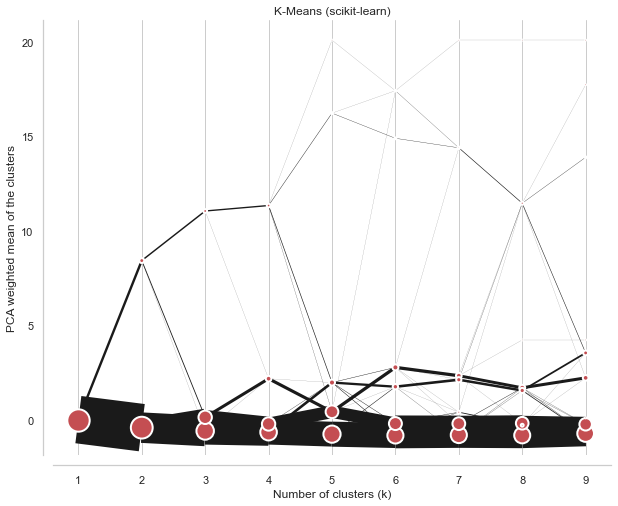

In [20]:
cgram = Clustergram(range(1, 10), method='kmeans')
cgram.fit(scaled_df)

ax = cgram.plot(
    figsize=(10, 8),
)
ax.yaxis.grid(False)
sns.despine(offset=10)
ax.set_title('K-Means (scikit-learn)')

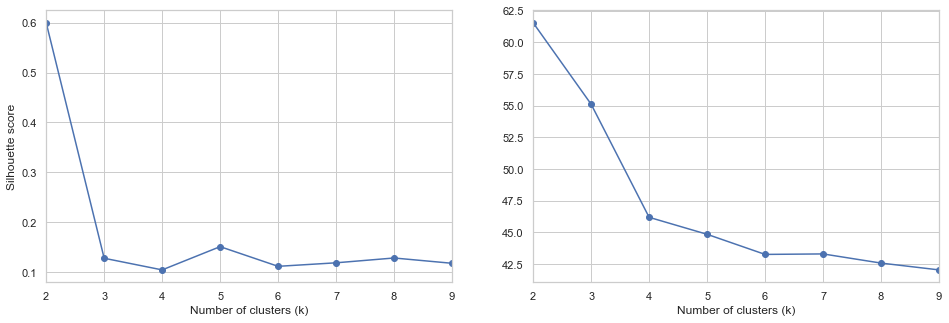

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharex=True)

cgram.silhouette_score().plot(ax=axs[0], marker='o')
cgram.calinski_harabasz_score().plot(ax=axs[1], marker='o')

axs[0].set_ylabel("Silhouette score")
axs[0].set_xlabel("Number of clusters (k)")

axs[1].set_xlabel("Calinski-Harabasz score")
axs[1].set_xlabel("Number of clusters (k)");

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters=3).fit(scaled_df)
preds = kmeans.predict(scaled_df)
scaled_df['cluster_preds'] = preds

print('Clusters:', np.unique(preds, return_counts=True))
scaled_df.head()

Clusters: (array([0, 1, 2]), array([ 14, 297, 168], dtype=int64))


,toal_income,total_expendature,median_income,median_expendature,mean_income,mean_expendature,credit_card,n_expenditure,n_income,Cash_sum,...,Hotel/Motel (Lodging)_len,Mail/Telephone/Preauth order_len,Not found_len,Payment Services_len,Restaurant_len,Retail Purchase_len,Transportation_len,Unique_len,Vehicle Rental_len,cluster_preds
0,-0.313139,0.133457,-0.049738,-0.331064,-0.320530,0.132325,-0.191824,1.082391,-1.136834,-0.040842,...,-0.305778,-0.372917,-0.148606,-0.615887,0.653821,0.041133,-0.404253,-0.602945,4.387070,1
1,0.290600,-0.331274,-0.049738,-0.231527,0.327208,-0.367541,-0.191824,-0.183363,0.025685,-0.040842,...,-0.305778,-0.372917,-0.148606,-0.615887,-0.062995,0.338756,-0.491497,0.398448,-0.155842,1
2,0.274609,-1.036205,-0.049738,-0.906385,0.323682,-1.137159,-0.191824,-0.183363,-0.103483,-0.040842,...,-0.305778,-0.240576,0.570406,-0.615887,-0.575006,0.874478,-0.535119,-0.170526,-0.155842,1
3,0.249346,-0.169807,-0.049738,0.495089,0.240379,-0.153108,-0.191824,-1.171269,1.511127,-0.040842,...,-0.305778,-0.372917,-0.148606,-0.372760,-0.370202,0.259390,-0.535119,0.944662,-0.155842,2
4,-0.223451,0.295095,-0.049738,0.556842,-0.211909,0.282697,-0.191824,0.372334,-0.749328,-0.040842,...,-0.305778,-0.472173,-0.148606,-0.615887,-0.882213,1.191943,1.253376,-0.944329,-0.155842,1


In [24]:
cluster_grouped = scaled_df.groupby(by='cluster_preds').mean()
cluster_grouped

,toal_income,total_expendature,median_income,median_expendature,mean_income,mean_expendature,credit_card,n_expenditure,n_income,Cash_sum,...,Hospitalization/School Expense_len,Hotel/Motel (Lodging)_len,Mail/Telephone/Preauth order_len,Not found_len,Payment Services_len,Restaurant_len,Retail Purchase_len,Transportation_len,Unique_len,Vehicle Rental_len
cluster_preds,,,,,,,,,,,,,,,,,,,,,
0,4.039358,-4.813244,-0.049738,-2.613811,4.036245,-4.816905,-0.191824,0.273102,-0.055045,1.520446,...,0.325267,0.492846,0.430582,1.289418,-0.063642,0.258841,-0.412388,-0.447875,0.219627,0.050654
1,-0.194970,0.178213,-0.049738,0.147229,-0.195882,0.177324,0.099350,0.513805,-0.541222,-0.048569,...,0.112962,0.063149,-0.253053,-0.025139,-0.363264,0.273289,0.427742,0.193821,-0.418269,-0.060590
2,0.008066,0.086048,0.092074,-0.042463,0.009938,0.087924,-0.159652,-0.931092,0.961391,-0.040842,...,-0.226806,-0.152708,0.411479,-0.063009,0.647503,-0.504706,-0.721822,-0.305325,0.721137,0.102893


In [25]:
important_columns = [column for column in cluster_grouped.columns if not 'median' in column]

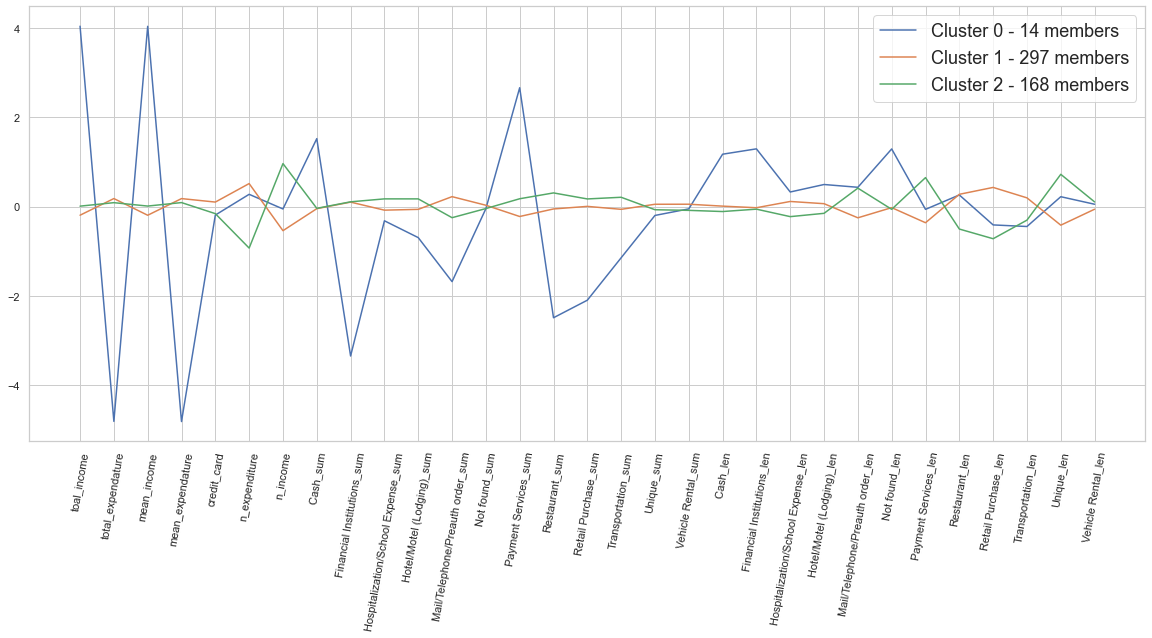

In [26]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

for i, row in enumerate(cluster_grouped[important_columns].values):
    plt.plot(row, label=f'Cluster {i} - {np.unique(preds, return_counts=True)[1][i]} members')

    
ax.set_xticks(range(len(important_columns)));
ax.set_xticklabels(important_columns, rotation=80)

plt.legend(fontsize=18)

In [27]:
transactions.sample(1)

,ID клиента по порядку,ID карты по порядку,Счет карты кредитный,Дата,Сумма,Валюта,Назначение платежа,МСС код,МСС расшифровка,Приход,Расход,Категория
119368,437,405,Нет,17.08.2021,-25.99,RUR,Покупка ARPS.PRO,4131.0,4131 Bus Lines,0.0,-25.99,Transportation


In [28]:
mcc = transactions['МСС расшифровка']
purpose = transactions['Назначение платежа']

In [29]:
mcc_tags_dict = {str(mc).split()[0]: ' '.join(str(mc).split()[1:]) for mc in mcc.values}  

In [30]:
shops_dict = {str(mc).split()[0]: set() for mc in mcc.values}  

In [31]:
for i in range(transactions.shape[0]):
    code = str(mcc[i]).split()[0]
    prp = ' '.join(transactions.loc[i, 'Назначение платежа'].split()[1:])
   # print(code)

    shops_dict[code].add(prp)

In [32]:
for key in shops_dict.keys():
    shops_dict[key] = '; '.join(list(shops_dict[key]))
    
shops_dict

{'4829': 'PSB-RETAIL 00887774; 00887751; PSB-RETAIL 00887775; PSB-RETAIL 00888887; 00887754; PSB-RETAIL 00887772; PSB-RETAIL 00888882; PSB-RETAIL 00888885; 00887757; 00887753; 00779901; PSB RETAIL TO_YUR CLIENT; 00887755; 00887750; PSB-RETAIL 00888888; PSB-RETAIL 00777782; PSB-RETAIL 00888880; AFT-SBP NO FEE; 00779903; PSB-RETAIL 00887773; PSB-RETAIL 00888884; PSB-RETAIL 00887770; 00887752; PSB-RETAIL 00887771; 00778891; PSB-RETAIL 00888889; PSB-RETAIL 00888886; PSB-RETAIL 00777781; 00887756; PSB-RETAIL 00888881; 00779902; AFT-SBP FEE; PSB-RETAIL 00888883; PSB RETAIL TO_OUT CLIENT',
 '5399': 'KOZURMAN; PAV. N51 BAPB; chistaya polza; IP KONDRATYUK N.S.; PSB-RETAIL 00888890; YM*ru.intimissimi; YM WILDBERRIES; IP SAGATELYAN O S; MEDVEZHONOK; GALAMART; YM*market.yandex; SHOP MIX SHOP BPSB; KINGSMOOTHIE; PRODUKTY PITANIYA; KUTUZOV R.I.; PSB-RETAIL 00888791; AVRORA24; UYUTNIE SHTUCHKI; UPAKOVKA; Westland; PSB-RETAIL 00888896; PAV. N130 BAPB; PSB-RETAIL 00887502; NIZHEGORODSKIJ MASTER; JOOM; 

In [33]:
transactions['tags'] = [mcc_tags_dict[str(code).split()[0]] for code in (transactions['МСС расшифровка'])]

In [34]:
tags = pd.DataFrame()
tags['code'] = np.array(list(set(str(code).split()[0] for code in transactions['МСС расшифровка'])))
tags['tags'] = [mcc_tags_dict[el] for el in tags.code]
tags['shops'] = [shops_dict[el] for el in tags.code]

In [35]:
tags_dict = {'': ['No info']}

for tag in tags.tags:
    idx = min(len(tag), 5)
    if tags_dict.get(tag[:idx]) is None:
        tags_dict[tag[:idx]] = []
    tags_dict[tag[:idx]].append(tag)

In [36]:
tags.drop('shops', axis=1).to_csv('tags_without_shops.csv')
tags.to_csv('tags.csv')

In [37]:
import os

In [38]:
os.listdir()

['.git',
 '.idea',
 '.ipynb_checkpoints',
 'avk_hackathon_data_story_logs.csv',
 'data',
 'manual_markup.py',
 'PolukarovFile.csv',
 'PolukarovFile.xls',
 'PolukarovIdeasCase1.ipynb',
 'PolukarovIdeasCase2.ipynb',
 'README.md',
 'tags.csv',
 'tags_without_shops.csv']

In [39]:
tags.head()

,code,tags,shops
0,6538,MasterCard MoneySend Funding Transaction,MONEYMAN; Mob card; MND PAPAZAIM; moneyman; CA...
1,5310,Discount stores,IP SHARTSMAN T R; MPR; KHOZMARKET; IP ASHUROV;...
2,5046,Commercial Equipment N-Else,VENDING
3,6533,Payment Service Provider -,binance.com
4,5965,Direct Marketing-Combinatio,NLSTAR


In [40]:
categories = ['HardwareAndSoftware', 'Hobbies', 'Furnurure',
              'Shops', 'Food', 'Restaraunts', 'Transactions',
              'Transportation', 'Entertainment', 'TaxesAndFines',
              'Services', 'Subscriptions']

ans = []

for tag in tags.tags:
    print(f'\n======== {tag} ========')
    for i in range(len(categories)):
        print(f'{i+1}){categories[i]}')
    print('0)Other')
        Q
    n = int(input())
    
    if n == 0:
        print('Enter new category:')
        new_category = input()
        categories.append(new_category)
        
        ans.append(categories[-1])
        
    ans.append(categories[n-1])

IndentationError: unexpected indent (<ipython-input-40-f7e17d6be631>, line 13)